<a href="https://colab.research.google.com/github/EntityErrorr/CSE427-Machine-Learning/blob/main/CSE427_PROJECT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Loading and Imports


In [ ]:
!pip uninstall -y scikit-learn
!pip install scikit-learn==1.3.1
!pip install catboost

Found existing installation: scikit-learn 1.3.1
Uninstalling scikit-learn-1.3.1:
  Successfully uninstalled scikit-learn-1.3.1
  Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (11 kB)
Using cached scikit_learn-1.3.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (10.8 MB)


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, average_precision_score, precision_score, recall_score, classification_report, PrecisionRecallDisplay, RocCurveDisplay, confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
import lightgbm as lgb
from catboost import CatBoostClassifier
import warnings
warnings.filterwarnings('ignore')
import shap

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:
file_link = 'https://drive.google.com/file/d/1Iqnkrfy97CHCEUZYPOhrxbpzUEQLeyDD/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)

# let's look at the first few instances
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


# Exploratory Data Analysis

In [ ]:
df.shape

(12330, 18)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [ ]:
df.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


**The data does not have any null value.**


In [ ]:
df.describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType
count,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000,12330.000000
mean,2.315166,80.818611,0.503569,34.472398,31.731468,1194.746220,0.022191,0.043073,5.889258,0.061427,2.124006,2.357097,3.147364,4.069586
std,3.321784,176.779107,1.270156,140.749294,44.475503,1913.669288,0.048488,0.048597,18.568437,0.198917,0.911325,1.717277,2.401591,4.025169
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,7.000000,184.137500,0.000000,0.014286,0.000000,0.000000,2.000000,2.000000,1.000000,2.000000
50%,1.000000,7.500000,0.000000,0.000000,18.000000,598.936905,0.003112,0.025156,0.000000,0.000000,2.000000,2.000000,3.000000,2.000000
75%,4.000000,93.256250,0.000000,0.000000,38.000000,1464.157214,0.016813,0.050000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
max,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,8.000000,13.000000,9.000000,20.000000


In [ ]:
cat_cols=df.select_dtypes(include=['object']).columns.tolist()
num_cols = df.select_dtypes(include=np.number).columns.tolist()
print("Categorical Variables:")
print(cat_cols)
print("Numerical Variables:")
print(num_cols)

Categorical Variables:
['Month', 'VisitorType']
Numerical Variables:
['Administrative', 'Administrative_Duration', 'Informational', 'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration', 'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'OperatingSystems', 'Browser', 'Region', 'TrafficType']


In [ ]:
print(df.dtypes)

Administrative               int64
Administrative_Duration    float64
Informational                int64
Informational_Duration     float64
ProductRelated               int64
ProductRelated_Duration    float64
BounceRates                float64
ExitRates                  float64
PageValues                 float64
SpecialDay                 float64
Month                       object
OperatingSystems             int64
Browser                      int64
Region                       int64
TrafficType                  int64
VisitorType                 object
Weekend                       bool
Revenue                       bool
dtype: object


Visualizing the distribution of numerical features.

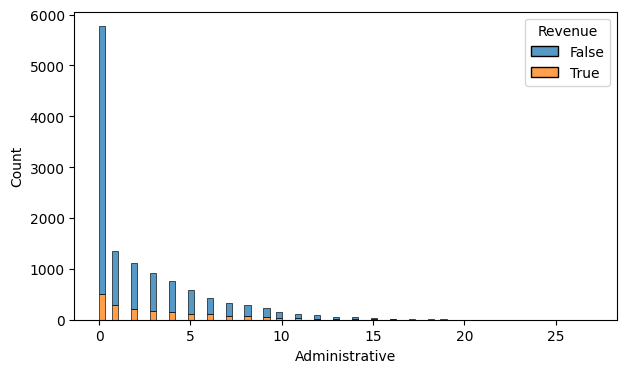

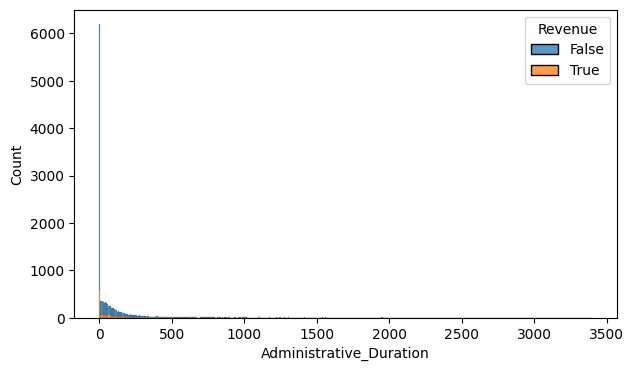

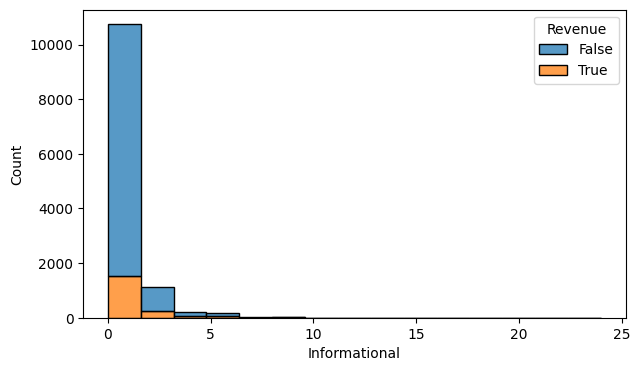

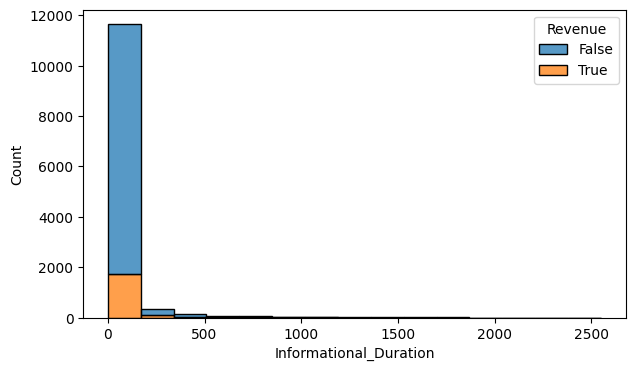

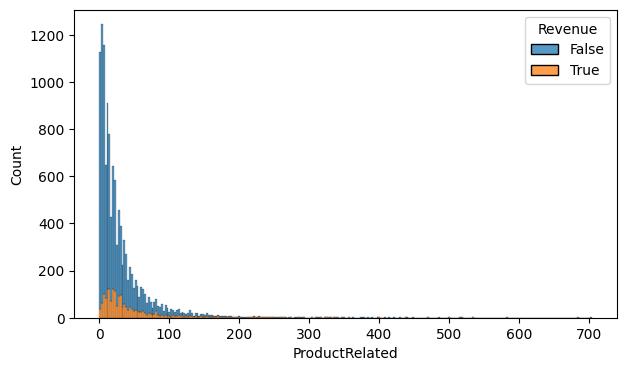

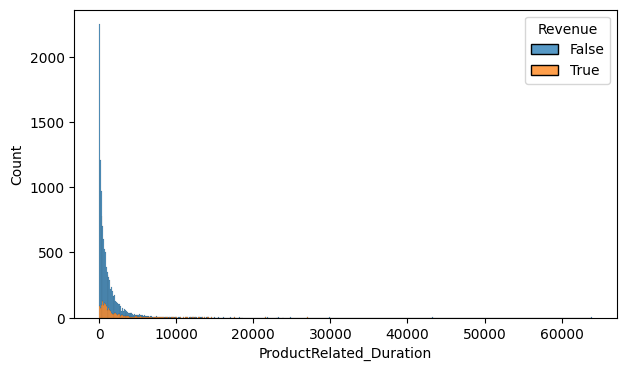

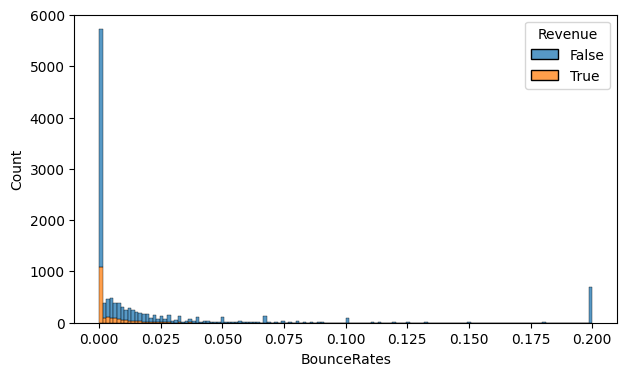

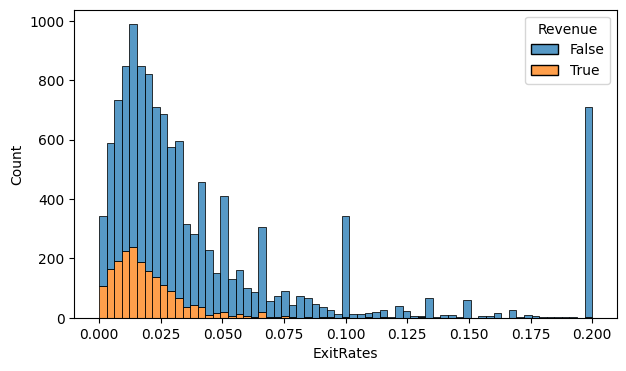

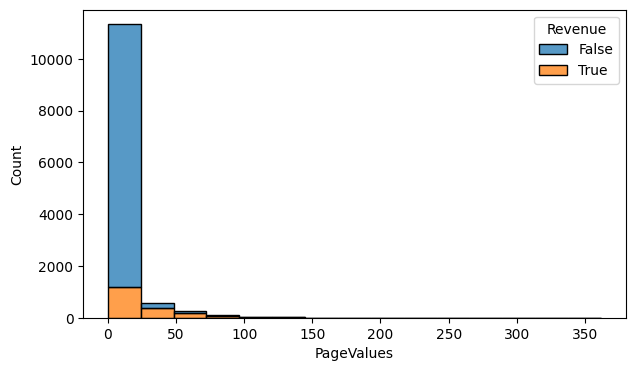

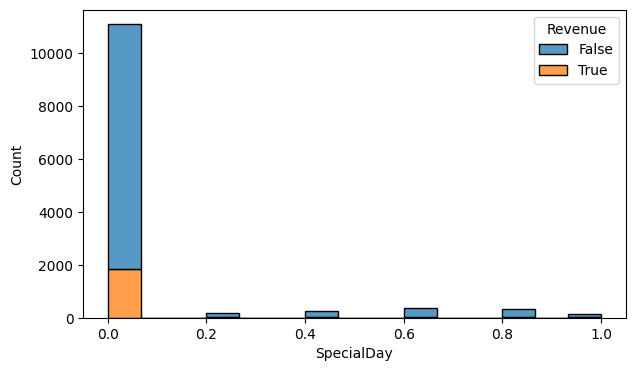

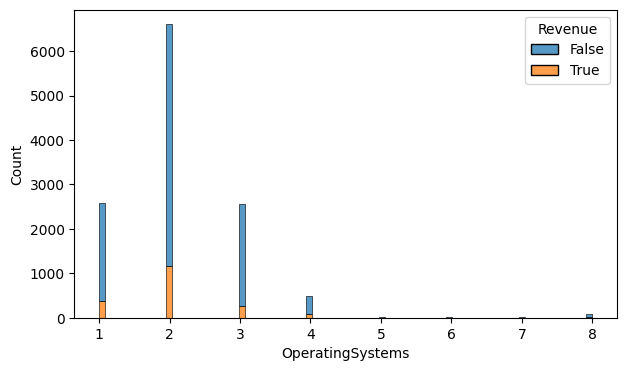

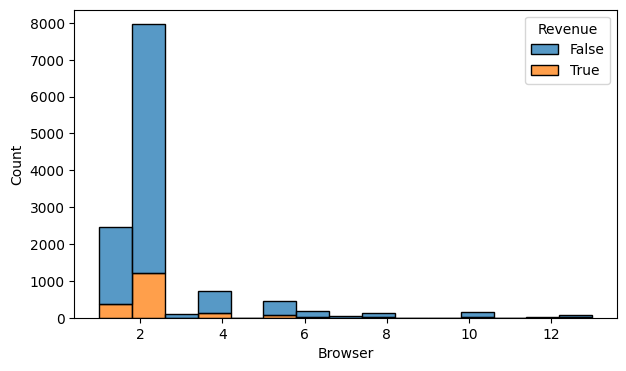

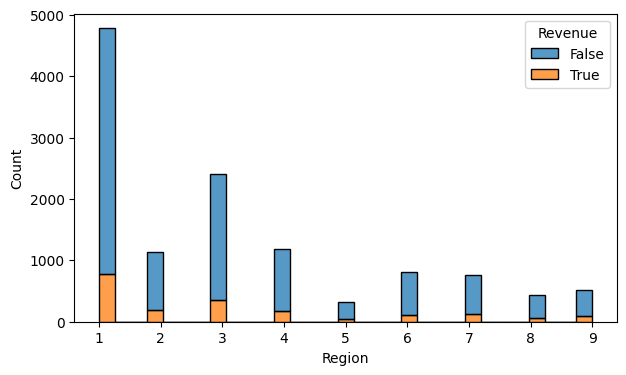

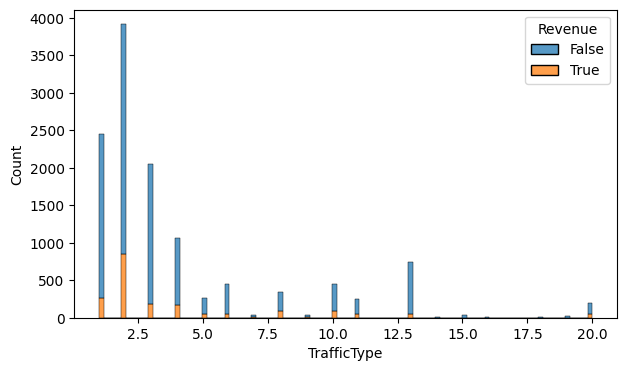

In [ ]:
for num_col in num_cols:
    plt.figure(figsize=(7,4))
    sns.histplot(df, x=num_col, hue='Revenue', multiple='stack')
    plt.show()

Visualizing the distribution of categorical features.

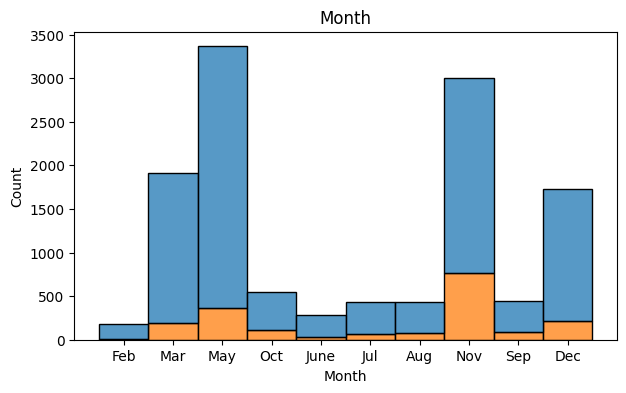

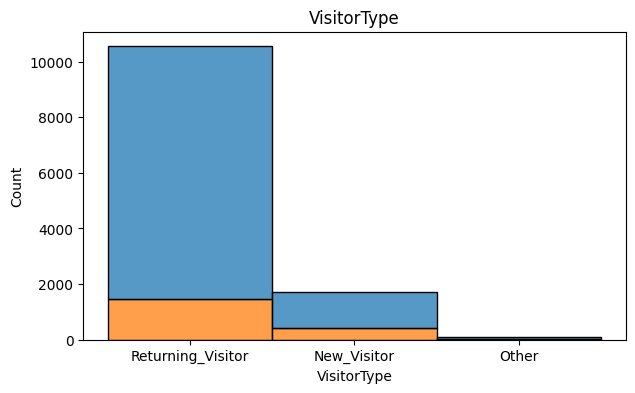

In [ ]:
for i in cat_cols:
    plt.figure(figsize=(7, 4))
    plt.title(i)
    ax = sns.histplot(df, x=i, legend=False, hue='Revenue', multiple='stack')

    plt.show()

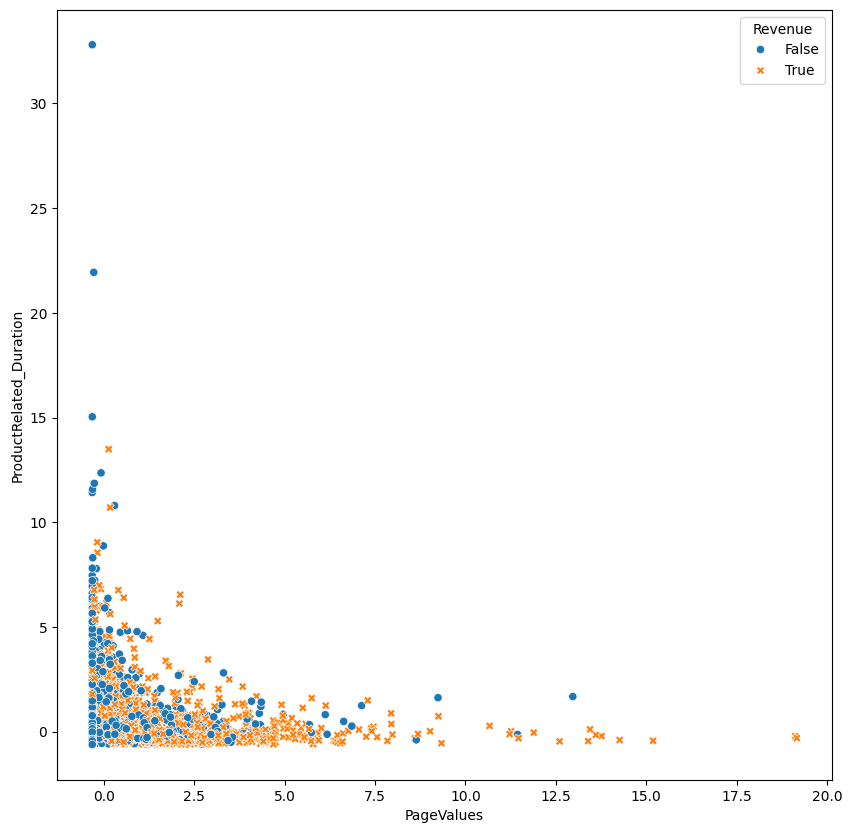

In [ ]:
df_scaled = pd.DataFrame(StandardScaler().fit_transform(df[num_cols]), columns=num_cols)
df_scaled['Revenue'] = df['Revenue']
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_scaled, x='PageValues', y='ProductRelated_Duration', hue='Revenue', style='Revenue')
plt.show()

**The lesser the time for the customers to browse related products, especially on popular pages, the more chance of a purchase will be.**

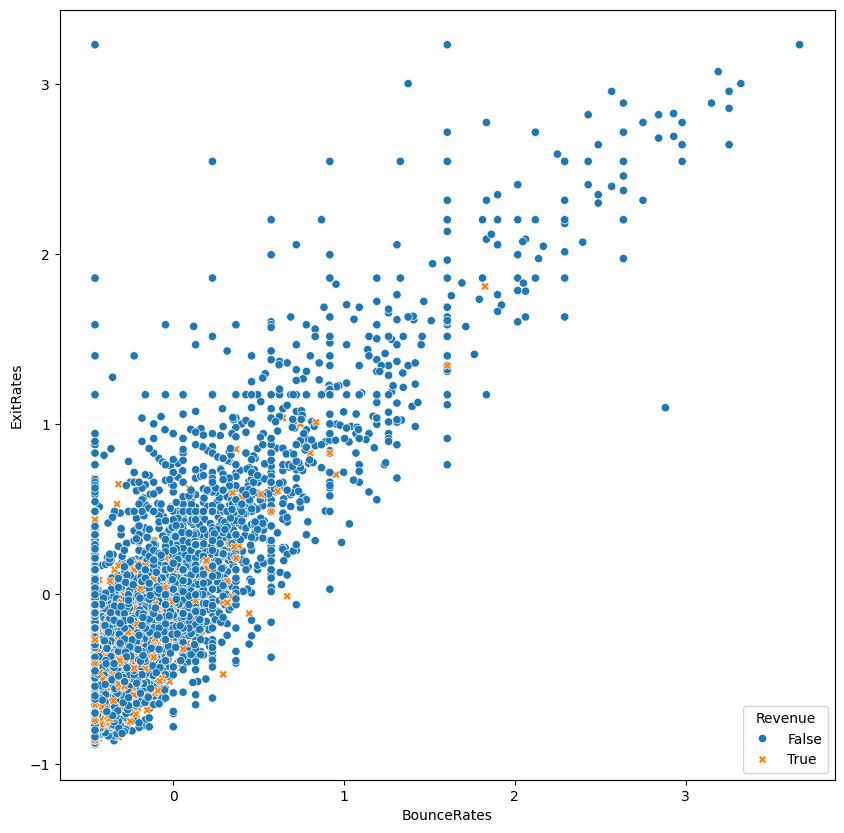

In [ ]:
plt.figure(figsize=(10,10))
sns.scatterplot(data=df_scaled, x='BounceRates', y='ExitRates', hue='Revenue', style='Revenue')
plt.show()

**Pages with hight ExitRates dan low BounceRates generated more revenue**

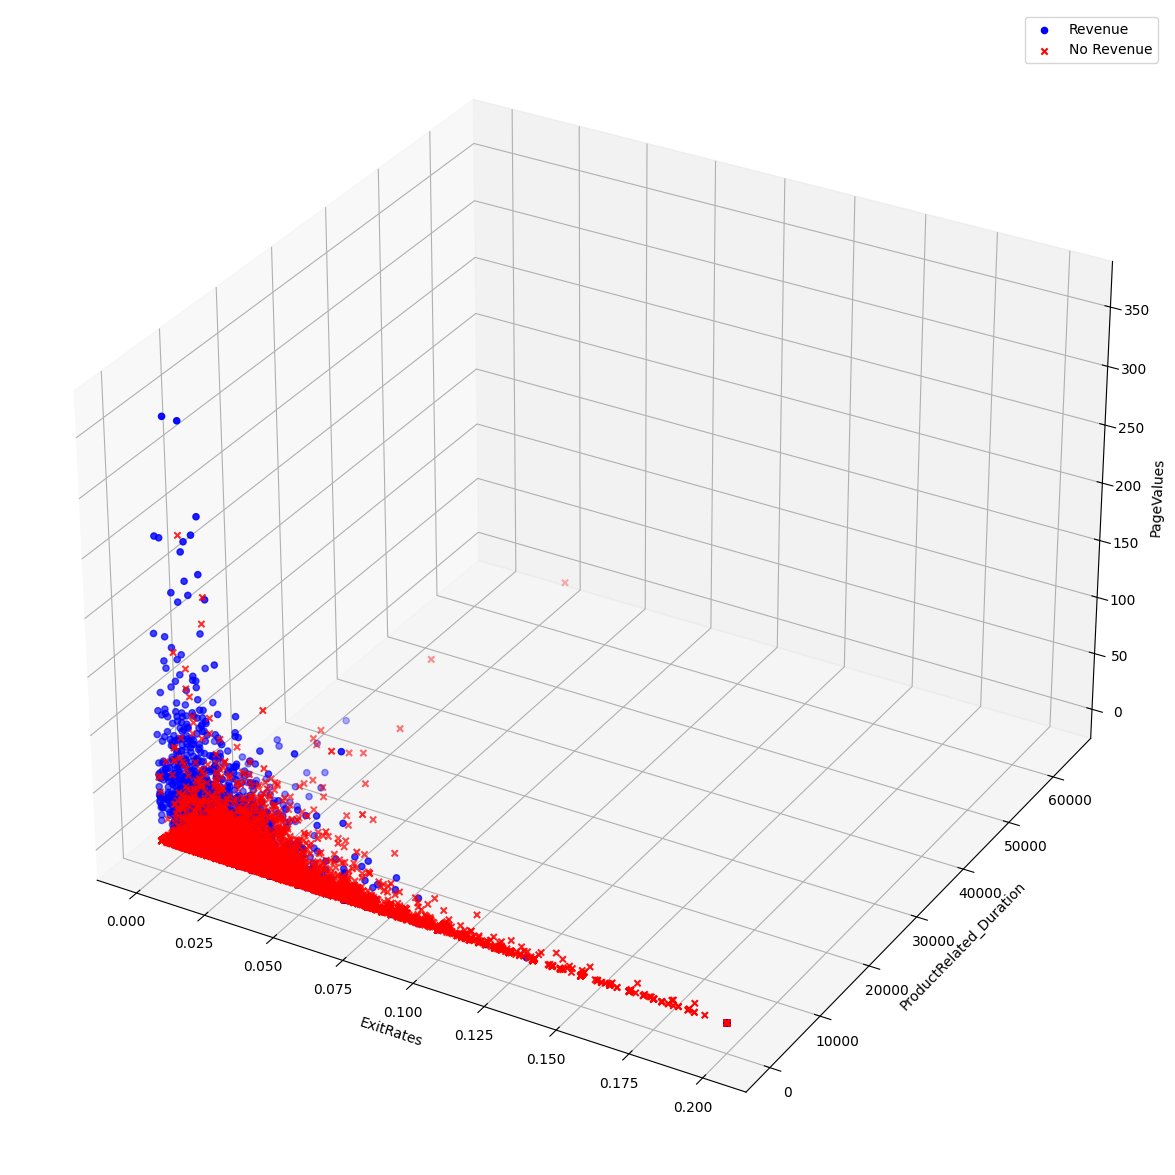

In [ ]:
from mpl_toolkits import mplot3d

fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(projection='3d')

# z = df.iloc[:, [5, 7, 8, 17]].T.to_numpy()
z1 = df[df["Revenue"] == True].iloc[:, [7, 5, 8, 17]].T.to_numpy()
z2 = df[df['Revenue'] == False].iloc[:, [7, 5, 8, 17]].T.to_numpy()

ax.scatter(z1[0], z1[1], z1[2], c='blue', marker='o', label='Revenue')
ax.scatter(z2[0], z2[1], z2[2], c='red', marker='x', label='No Revenue')

ax.set_xlabel('ExitRates')
ax.set_ylabel('ProductRelated_Duration')
ax.set_zlabel('PageValues')
ax.legend(loc='upper right', bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)
# ax.legend(handles=[z1_path, z2_path])

plt.show()

**Revenue tends to favor rows with high PageValues, low ExitRates, and low ProductRelated_Duration**

#Feature Engineering with SMOTE

In [ ]:
#drop duplicates
df = df.drop_duplicates()
df.shape

(12205, 18)

In [ ]:
df['Month'] = df['Month'].replace({"Jan": 1, "Feb": 2, "Mar": 3, "Apr": 4, "May": 5, "June": 6, "Jul": 7, "Aug": 8, "Sep": 9, "Oct": 10, "Nov": 11, "Dec": 12})

df['VisitorType'] = df['VisitorType'].astype('category')
df['Weekend'] = df['Weekend'].astype('category')

df['VisitorType'] = df['VisitorType'].cat.codes
df['Weekend'] = df['Weekend'].cat.codes

df['Revenue'] = df['Revenue'].astype('int64')

In [ ]:
df['Revenue'].value_counts()

,count
Revenue,
0,10297
1,1908


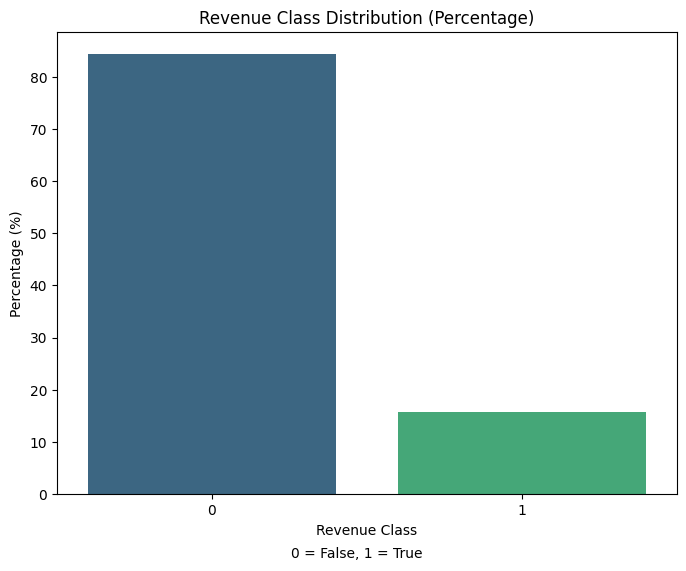

In [ ]:
# Calculate the percentage distribution of each class
revenue_counts = df['Revenue'].value_counts(normalize=True) * 100

# Plot the class distribution using a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=revenue_counts.index, y=revenue_counts.values, palette='viridis')

# Customize chart title and labels
plt.title('Revenue Class Distribution (Percentage)')
plt.xlabel('Revenue Class')
plt.ylabel('Percentage (%)')

# Customizing the x-axis labels to show False and True
plt.xticks(ticks=[0, 1], labels=['0', '1'])

# Adding a bottom note to explain the labels
plt.figtext(0.5, 0.01, '0 = False, 1 = True', ha='center', va='center', fontsize=10)

plt.show()

In [ ]:
from imblearn.over_sampling import SMOTE
# Splitting data into features (X) and target (y)
X = df.drop('Revenue', axis=1)  # Features
y = df['Revenue']               # Target

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Verify the new class distribution
print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_smote.value_counts())


Before SMOTE: Revenue
0    7207
1    1336
Name: count, dtype: int64
After SMOTE: Revenue
0    7207
1    7207
Name: count, dtype: int64


#MODEL

In [ ]:
# Dictionary to store results
results = {}
f1_scores = {}

# Function to evaluate models
def evaluate_model(y_true, y_pred, y_pred_proba=None):
    metrics = {
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1-Score': f1_score(y_true, y_pred)
    }
    if y_pred_proba is not None:
        metrics['ROC-AUC'] = roc_auc_score(y_true, y_pred_proba)
    return metrics

In [ ]:
# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0, 1], yticklabels=[0, 1])
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

SVM

--- SVM ---
Accuracy: 0.7258
Precision: 0.3238
Recall: 0.6941
F1-Score: 0.4416
ROC-AUC: 0.7919




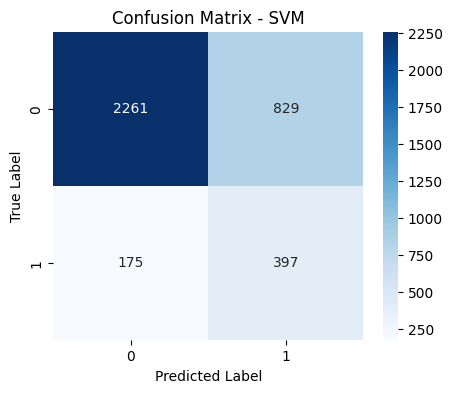

In [ ]:
svm = SVC(probability=True, random_state=42)
svm.fit(X_train_smote, y_train_smote)
svm_preds = svm.predict(X_test)
svm_probs = svm.predict_proba(X_test)[:, 1]
results['SVM'] = evaluate_model(y_test, svm_preds, svm_probs)
f1_scores['SVM'] = results['SVM']['F1-Score']
print("--- SVM ---")
for metric, value in results['SVM'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, svm_preds, "SVM")

Decision Tree

--- Decision Tree ---
Accuracy: 0.8528
Precision: 0.5226
Recall: 0.6661
F1-Score: 0.5857
ROC-AUC: 0.7767




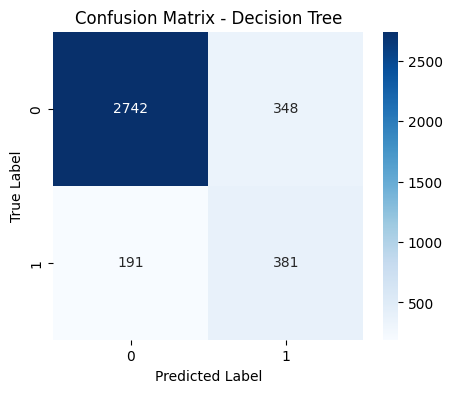

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_smote, y_train_smote)
dt_preds = dt.predict(X_test)
dt_probs = dt.predict_proba(X_test)[:, 1]
results['Decision Tree'] = evaluate_model(y_test, dt_preds, dt_probs)
f1_scores['Decision Tree'] = results['Decision Tree']['F1-Score']
# Print the evaluation results for Decision Tree
print("--- Decision Tree ---")
for metric, value in results['Decision Tree'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, dt_preds, "Decision Tree")

Random Forest

--- Random Forest ---
Accuracy: 0.8845
Precision: 0.6097
Recall: 0.7238
F1-Score: 0.6619
ROC-AUC: 0.9214




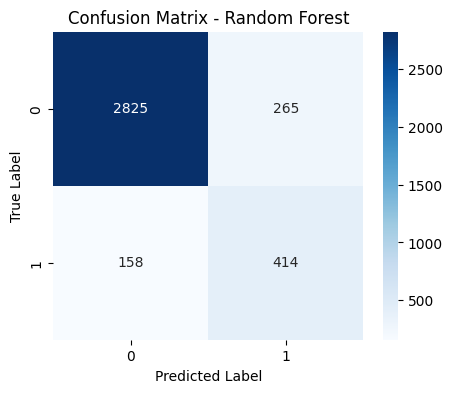

In [ ]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
rf_preds = rf.predict(X_test)
rf_probs = rf.predict_proba(X_test)[:, 1]
results['Random Forest'] = evaluate_model(y_test, rf_preds, rf_probs)
f1_scores['Random Forest'] = results['Random Forest']['F1-Score']
# Print the evaluation results for Random Forest
print("--- Random Forest ---")
for metric, value in results['Random Forest'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, rf_preds, "Random Forest")

XGBoost

--- XGBoost ---
Accuracy: 0.8861
Precision: 0.6228
Recall: 0.6871
F1-Score: 0.6534
ROC-AUC: 0.9190




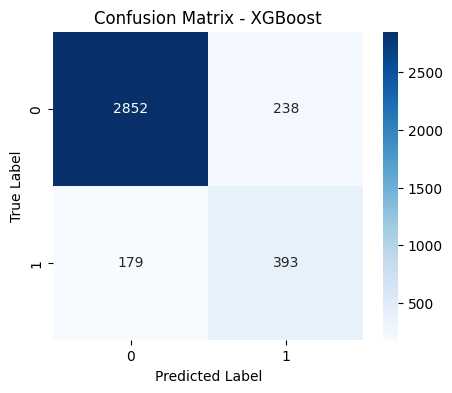

In [ ]:
xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_smote, y_train_smote)
xgb_preds = xgb_model.predict(X_test)
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]
results['XGBoost'] = evaluate_model(y_test, xgb_preds, xgb_probs)
f1_scores['XGBoost'] = results['XGBoost']['F1-Score']
# Print the evaluation results for XGBoost
print("--- XGBoost ---")
for metric, value in results['XGBoost'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, xgb_preds, "XGBoost")

Gaussian Naive Bayes

--- Gaussian Naive Bayes ---
Accuracy: 0.7758
Precision: 0.3829
Recall: 0.7115
F1-Score: 0.4979
ROC-AUC: 0.8090




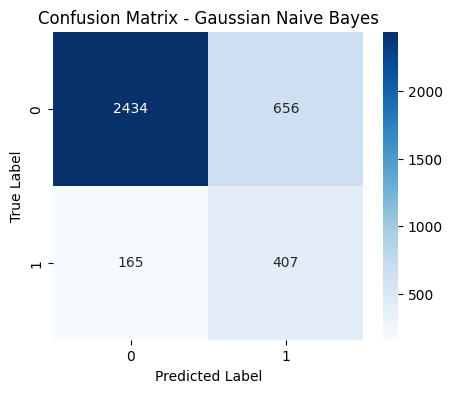

In [ ]:
gnb = GaussianNB()
gnb.fit(X_train_smote, y_train_smote)
gnb_preds = gnb.predict(X_test)
gnb_probs = gnb.predict_proba(X_test)[:, 1]
results['Gaussian Naive Bayes'] = evaluate_model(y_test, gnb_preds, gnb_probs)
f1_scores['Gaussian Naive Bayes'] = results['Gaussian Naive Bayes']['F1-Score']
# Print the evaluation results for Gaussian Naive Bayes
print("--- Gaussian Naive Bayes ---")
for metric, value in results['Gaussian Naive Bayes'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, gnb_preds, "Gaussian Naive Bayes")

LightGBM

[LightGBM] [Info] Number of positive: 7207, number of negative: 7207
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002363 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2149
[LightGBM] [Info] Number of data points in the train set: 14414, number of used features: 17
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
--- LightGBM ---
Accuracy: 0.8845
Precision: 0.6107
Recall: 0.7185
F1-Score: 0.6602
ROC-AUC: 0.9255




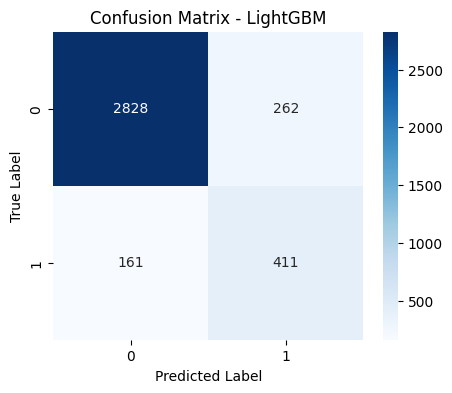

In [ ]:
lgb_model = lgb.LGBMClassifier(random_state=42)
lgb_model.fit(X_train_smote, y_train_smote)
lgb_preds = lgb_model.predict(X_test)
lgb_probs = lgb_model.predict_proba(X_test)[:, 1]
results['LightGBM'] = evaluate_model(y_test, lgb_preds, lgb_probs)
f1_scores['LightGBM'] = results['LightGBM']['F1-Score']
# Print the evaluation results for LightGBM
print("--- LightGBM ---")
for metric, value in results['LightGBM'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, lgb_preds, "LightGBM")

CatBoost

--- CatBoost ---
Accuracy: 0.8875
Precision: 0.6212
Recall: 0.7168
F1-Score: 0.6656
ROC-AUC: 0.9234




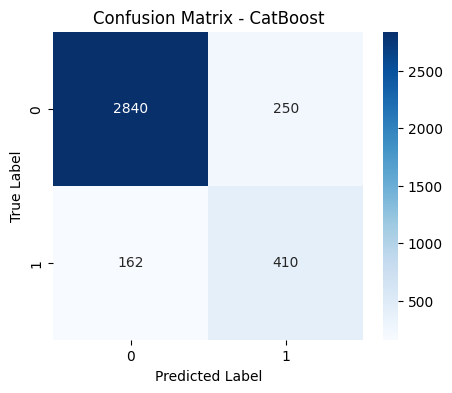

In [ ]:
cat_model = CatBoostClassifier(verbose=0, random_state=42)
cat_model.fit(X_train_smote, y_train_smote)
cat_preds = cat_model.predict(X_test)
cat_probs = cat_model.predict_proba(X_test)[:, 1]
results['CatBoost'] = evaluate_model(y_test, cat_preds, cat_probs)
f1_scores['CatBoost'] = results['CatBoost']['F1-Score']
# Print the evaluation results for CatBoost
print("--- CatBoost ---")
for metric, value in results['CatBoost'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, cat_preds, "CatBoost")

AdaBoost

--- AdaBoost ---
Accuracy: 0.8758
Precision: 0.5807
Recall: 0.7360
F1-Score: 0.6492
ROC-AUC: 0.9033




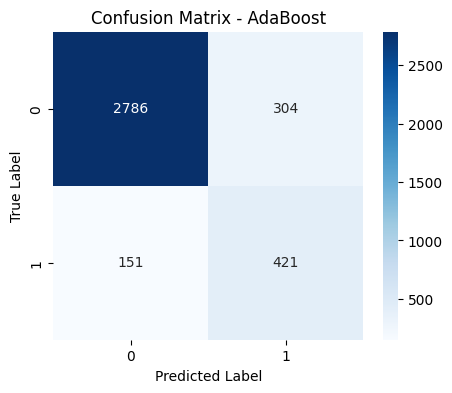

In [ ]:
adaboost = AdaBoostClassifier(random_state=42)
adaboost.fit(X_train_smote, y_train_smote)
adaboost_preds = adaboost.predict(X_test)
adaboost_probs = adaboost.predict_proba(X_test)[:, 1]
results['AdaBoost'] = evaluate_model(y_test, adaboost_preds, adaboost_probs)
f1_scores['AdaBoost'] = results['AdaBoost']['F1-Score']
# Print the evaluation results for AdaBoost
print("--- AdaBoost ---")
for metric, value in results['AdaBoost'].items():
    print(f"{metric}: {value:.4f}")
print("\n")
plot_confusion_matrix(y_test, adaboost_preds, "AdaBoost")

BEST MODEL

In [ ]:
# Identify the Best Model Based on F1-Score
best_model_name = max(f1_scores, key=f1_scores.get)
print(f"The best model is: {best_model_name}")

# Detailed Classification Report for the Best Model
print("Classification Report for the Best Model:")
if best_model_name == 'SVM':
    print(classification_report(y_test, svm_preds))
elif best_model_name == 'Random Forest':
    print(classification_report(y_test, rf_preds))
elif best_model_name == 'Gaussian Naive Bayes':
    print(classification_report(y_test, gnb_preds))
elif best_model_name == 'XGBoost':
    print(classification_report(y_test, xgb_preds))
elif best_model_name == 'LightGBM':
    print(classification_report(y_test, lgb_preds))
elif best_model_name == 'CatBoost':
    print(classification_report(y_test, cat_preds))
elif best_model_name == 'AdaBoost':
    print(classification_report(y_test, adaboost_preds))
elif best_model_name == 'Decision Tree':
    print(classification_report(y_test, dt_preds))

The best model is: CatBoost
Classification Report for the Best Model:
              precision    recall  f1-score   support

           0       0.95      0.92      0.93      3090
           1       0.62      0.72      0.67       572

    accuracy                           0.89      3662
   macro avg       0.78      0.82      0.80      3662
weighted avg       0.90      0.89      0.89      3662



In [ ]:
# Create a DataFrame for better visualization of the evaluation metrics
metrics_df = pd.DataFrame(results).T

# Find the row corresponding to the highest F1-Score
best_model = max(f1_scores, key=f1_scores.get)

# Apply styling to the DataFrame for better readability
styled_metrics_df = metrics_df.style.background_gradient(cmap='Blues', axis=None)\
    .format('{:.4f}')\
    .set_table_styles([
        {'selector': 'th', 'props': [('background-color', '#4c72b0'), ('color', 'white'), ('font-size', '14px')]},
        {'selector': 'td', 'props': [('text-align', 'center'), ('font-size', '12px')]},
        {'selector': 'table', 'props': [('width', '100%'), ('border-collapse', 'collapse')]}
    ])\
    .apply(lambda x: ['background-color: lightgreen' if x.name == best_model else '' for _ in x], axis=1)

# Display the styled DataFrame
styled_metrics_df




,Accuracy,Precision,Recall,F1-Score,ROC-AUC
SVM,0.7258,0.3238,0.6941,0.4416,0.7919
Decision Tree,0.8528,0.5226,0.6661,0.5857,0.7767
Random Forest,0.8845,0.6097,0.7238,0.6619,0.9214
XGBoost,0.8861,0.6228,0.6871,0.6534,0.9190
Gaussian Naive Bayes,0.7758,0.3829,0.7115,0.4979,0.8090
LightGBM,0.8845,0.6107,0.7185,0.6602,0.9255
CatBoost,0.8875,0.6212,0.7168,0.6656,0.9234
AdaBoost,0.8758,0.5807,0.7360,0.6492,0.9033


# SHAP ANALYSIS

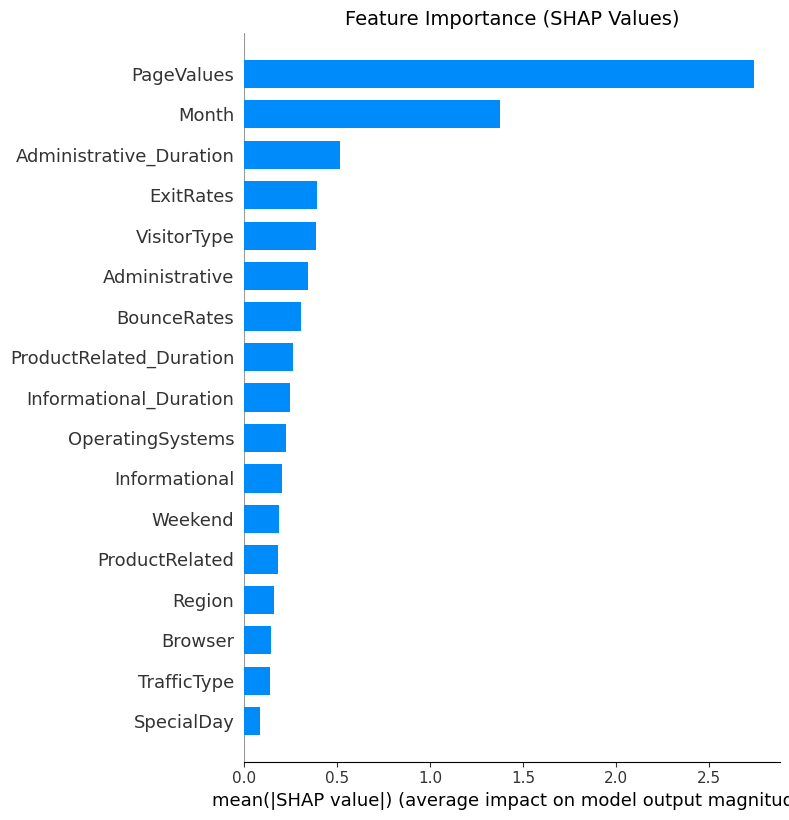

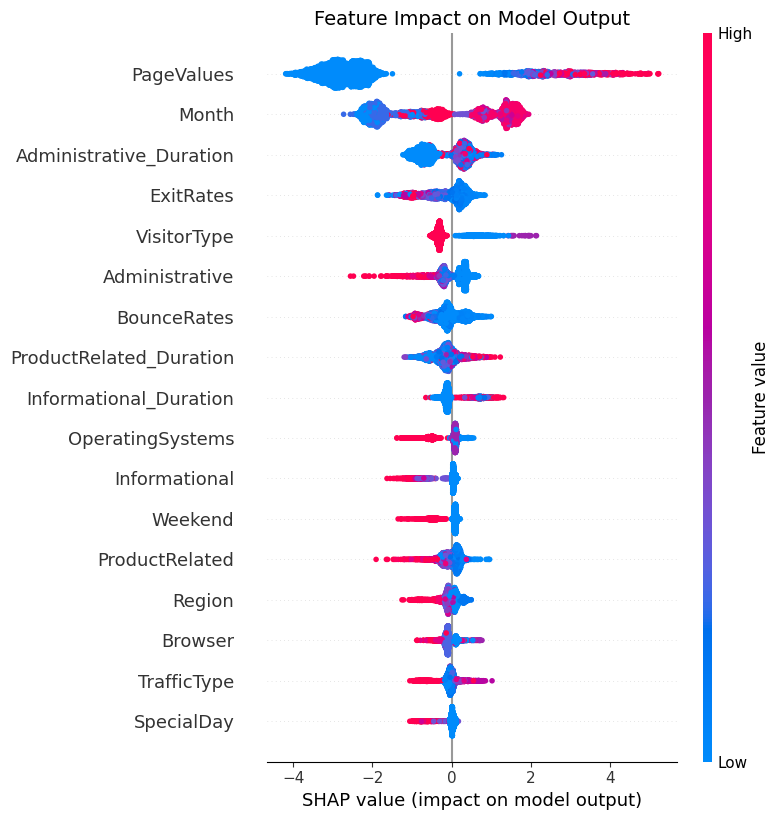

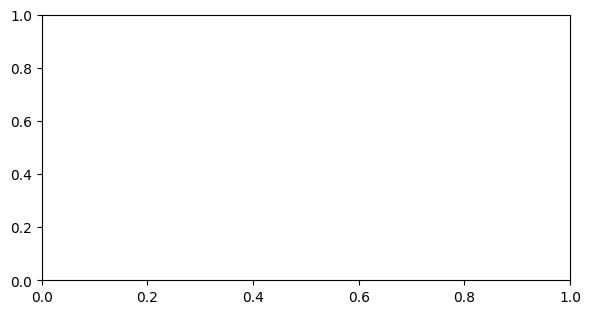

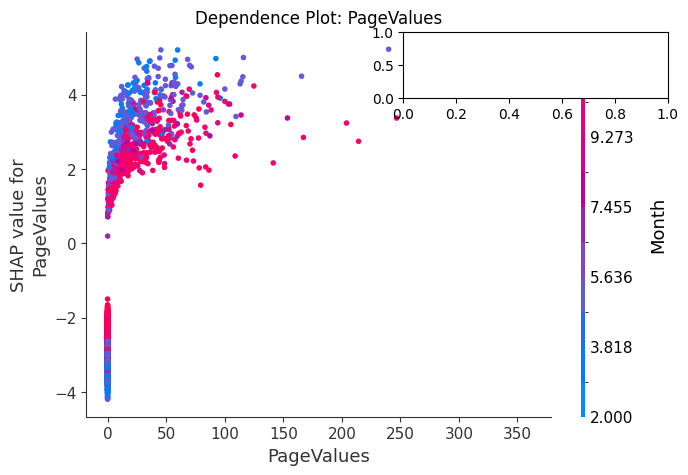

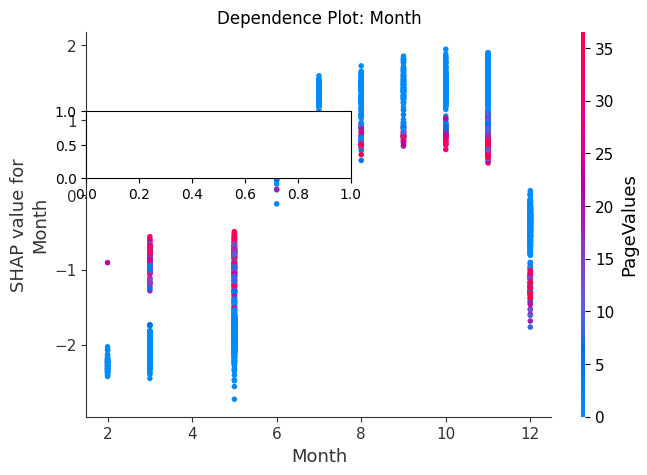

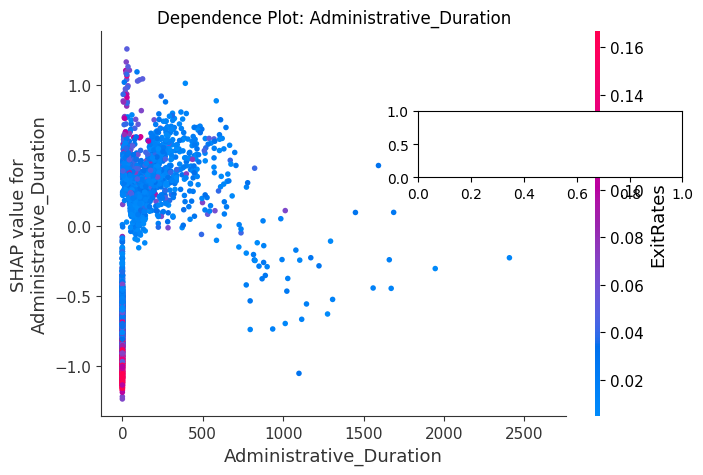

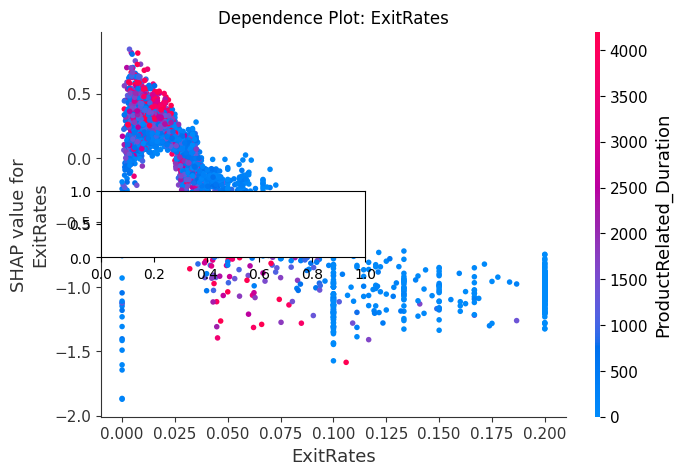

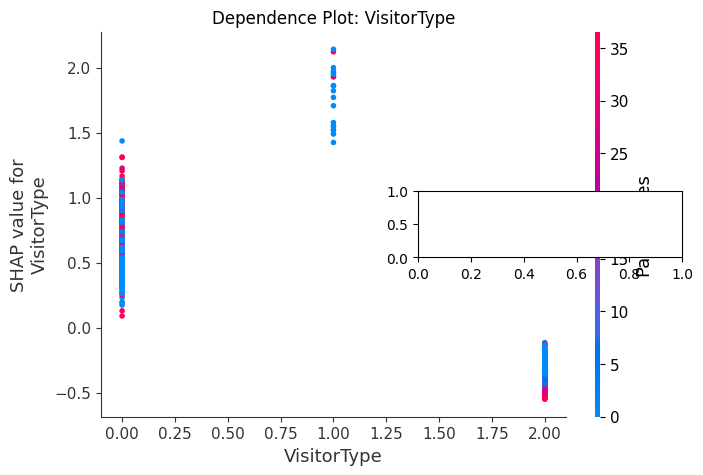

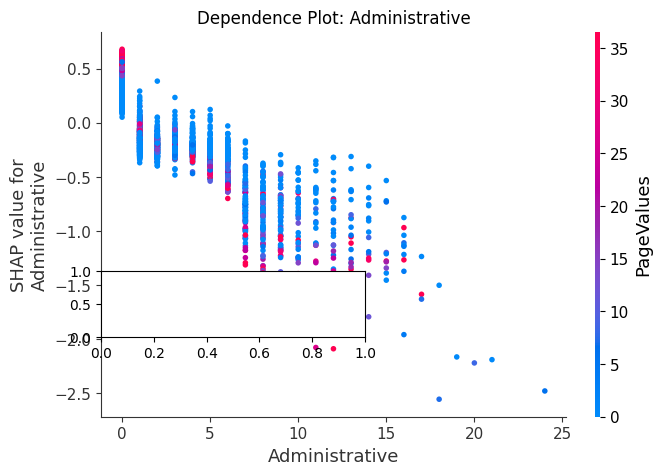

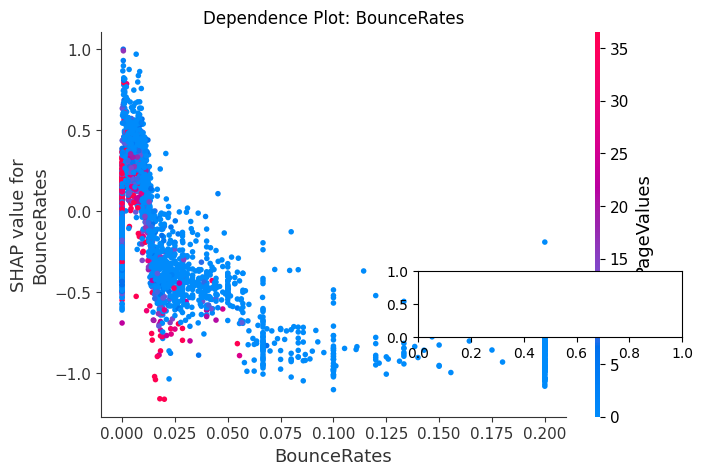

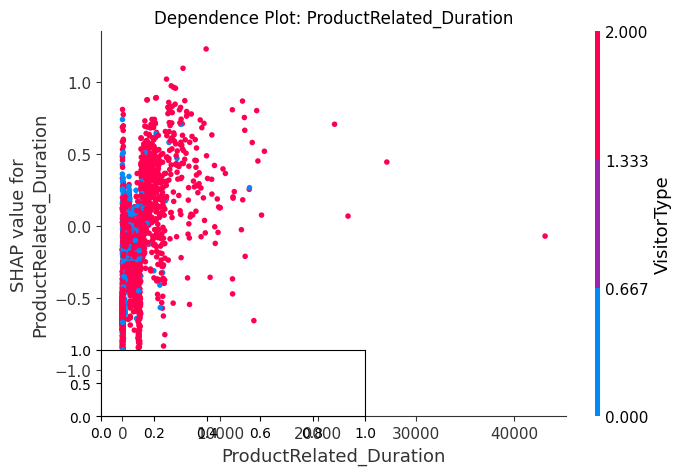

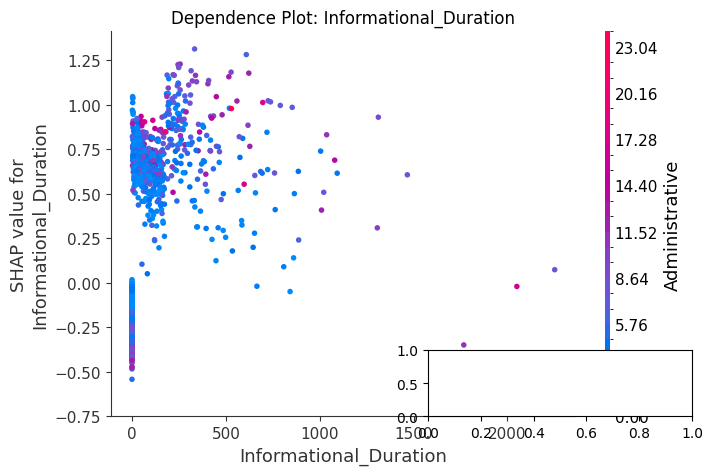

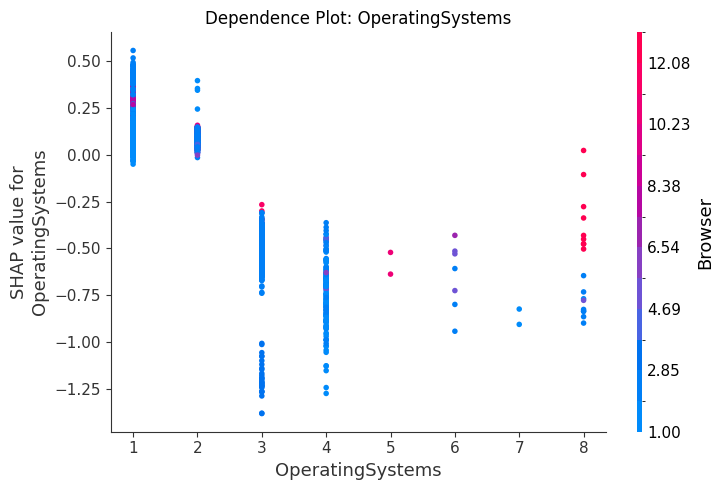

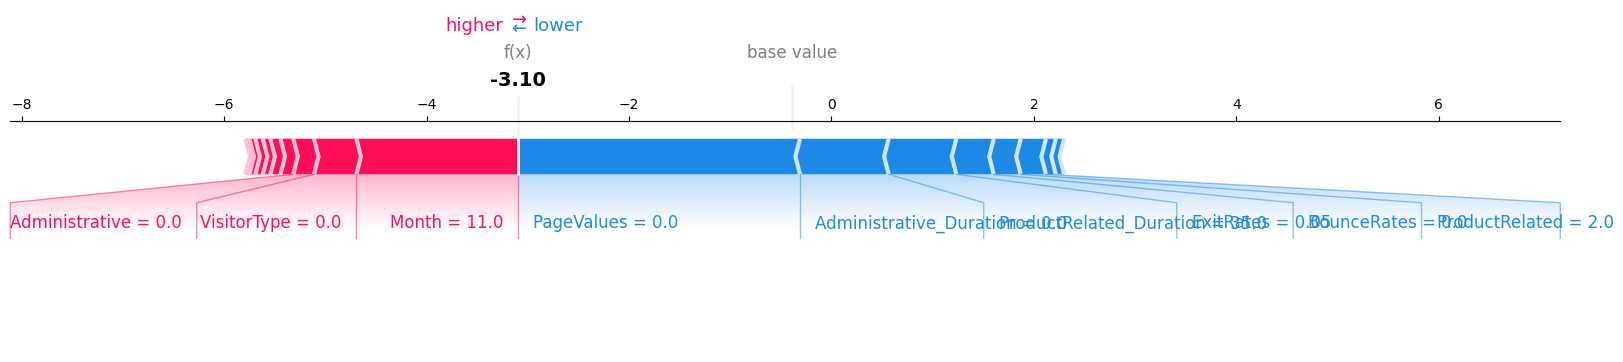

In [ ]:
# Initialize SHAP Explainer for CatBoost
explainer = shap.TreeExplainer(cat_model)

# Compute SHAP values
shap_values = explainer.shap_values(X_test)

# 1. Feature Importance (Bar Plot)
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Feature Importance (SHAP Values)", fontsize=14)
plt.tight_layout()
plt.show()

# 2. Feature Impact and Distribution (Beeswarm Plot)
plt.figure(figsize=(12, 10))
shap.summary_plot(shap_values, X_test, show=False)
plt.title("Feature Impact on Model Output", fontsize=14)
plt.tight_layout()
plt.show()

# 3. Top 10 Feature Dependence Plots
top_features = pd.DataFrame(np.abs(shap_values).mean(0), columns=['importance'], index=X_test.columns)
top_features = top_features.sort_values('importance', ascending=False).head(10).index

plt.figure(figsize=(15, 20))
for i, feature in enumerate(top_features, 1):
    plt.subplot(5, 2, i)
    shap.dependence_plot(feature, shap_values, X_test, show=False)
    plt.title(f"Dependence Plot: {feature}", fontsize=12)
plt.tight_layout()
plt.show()

# 4. Individual Prediction Explanation (Force Plot)
sample_idx = 0  # Change this index to analyze different samples
shap.initjs()  # Enables interactive visualization

# Display force plot
shap.force_plot(
    explainer.expected_value, shap_values[sample_idx, :], X_test.iloc[sample_idx, :],
    matplotlib=True
)
